# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Plot an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

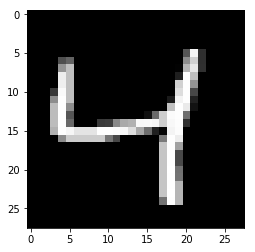

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically a simple autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer,a hiiden layer and the compressed layer. The decoder is the compressed layer, a hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [4]:
# Size of the encoding layer (the hidden layer)
encoding_dimension = 64
image_dimension = mnist.train.images.shape[1]
learning_rate = 0.0005

In [10]:
# Input and target placeholders
inputs_ = tf.placeholder(tf.float32,shape=(None,image_dimension),name = "inputs")
targets_ = tf.placeholder(tf.float32,shape=(None,image_dimension),name = "targets")

encoder_hidden_layer = tf.layers.dense(inputs_,encoding_dimension*2,activation=tf.nn.relu)

# Reduced representation: Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(encoder_hidden_layer,encoding_dimension,activation=tf.nn.relu)


# Decoder hidden layer
decoder_hidden_layer = tf.layers.dense(encoded,encoding_dimension*2,activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits =  tf.layers.dense(decoder_hidden_layer,image_dimension,activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=targets_)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

## Training

In [6]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [7]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6947
Epoch: 1/20... Training loss: 0.6926
Epoch: 1/20... Training loss: 0.6905
Epoch: 1/20... Training loss: 0.6883
Epoch: 1/20... Training loss: 0.6859
Epoch: 1/20... Training loss: 0.6826
Epoch: 1/20... Training loss: 0.6793
Epoch: 1/20... Training loss: 0.6746
Epoch: 1/20... Training loss: 0.6692
Epoch: 1/20... Training loss: 0.6628
Epoch: 1/20... Training loss: 0.6552
Epoch: 1/20... Training loss: 0.6469
Epoch: 1/20... Training loss: 0.6361
Epoch: 1/20... Training loss: 0.6246
Epoch: 1/20... Training loss: 0.6121
Epoch: 1/20... Training loss: 0.5981
Epoch: 1/20... Training loss: 0.5816
Epoch: 1/20... Training loss: 0.5626
Epoch: 1/20... Training loss: 0.5459
Epoch: 1/20... Training loss: 0.5252
Epoch: 1/20... Training loss: 0.5065
Epoch: 1/20... Training loss: 0.4835
Epoch: 1/20... Training loss: 0.4610
Epoch: 1/20... Training loss: 0.4440
Epoch: 1/20... Training loss: 0.4223
Epoch: 1/20... Training loss: 0.4010
Epoch: 1/20... Training loss: 0.3860
E

Epoch: 1/20... Training loss: 0.1702
Epoch: 1/20... Training loss: 0.1718
Epoch: 1/20... Training loss: 0.1638
Epoch: 1/20... Training loss: 0.1718
Epoch: 1/20... Training loss: 0.1653
Epoch: 1/20... Training loss: 0.1734
Epoch: 1/20... Training loss: 0.1649
Epoch: 1/20... Training loss: 0.1709
Epoch: 1/20... Training loss: 0.1607
Epoch: 1/20... Training loss: 0.1689
Epoch: 1/20... Training loss: 0.1710
Epoch: 1/20... Training loss: 0.1672
Epoch: 1/20... Training loss: 0.1697
Epoch: 1/20... Training loss: 0.1614
Epoch: 1/20... Training loss: 0.1663
Epoch: 1/20... Training loss: 0.1620
Epoch: 1/20... Training loss: 0.1587
Epoch: 1/20... Training loss: 0.1718
Epoch: 1/20... Training loss: 0.1629
Epoch: 1/20... Training loss: 0.1670
Epoch: 1/20... Training loss: 0.1690
Epoch: 1/20... Training loss: 0.1619
Epoch: 1/20... Training loss: 0.1675
Epoch: 1/20... Training loss: 0.1646
Epoch: 1/20... Training loss: 0.1624
Epoch: 1/20... Training loss: 0.1536
Epoch: 1/20... Training loss: 0.1673
E

Epoch: 2/20... Training loss: 0.1329
Epoch: 2/20... Training loss: 0.1277
Epoch: 2/20... Training loss: 0.1302
Epoch: 2/20... Training loss: 0.1290
Epoch: 2/20... Training loss: 0.1272
Epoch: 2/20... Training loss: 0.1290
Epoch: 2/20... Training loss: 0.1267
Epoch: 2/20... Training loss: 0.1337
Epoch: 2/20... Training loss: 0.1262
Epoch: 2/20... Training loss: 0.1257
Epoch: 2/20... Training loss: 0.1285
Epoch: 2/20... Training loss: 0.1255
Epoch: 2/20... Training loss: 0.1304
Epoch: 2/20... Training loss: 0.1280
Epoch: 2/20... Training loss: 0.1270
Epoch: 2/20... Training loss: 0.1315
Epoch: 2/20... Training loss: 0.1279
Epoch: 2/20... Training loss: 0.1317
Epoch: 2/20... Training loss: 0.1278
Epoch: 2/20... Training loss: 0.1244
Epoch: 2/20... Training loss: 0.1314
Epoch: 2/20... Training loss: 0.1343
Epoch: 2/20... Training loss: 0.1289
Epoch: 2/20... Training loss: 0.1262
Epoch: 2/20... Training loss: 0.1248
Epoch: 2/20... Training loss: 0.1285
Epoch: 2/20... Training loss: 0.1282
E

Epoch: 3/20... Training loss: 0.1163
Epoch: 3/20... Training loss: 0.1206
Epoch: 3/20... Training loss: 0.1084
Epoch: 3/20... Training loss: 0.1162
Epoch: 3/20... Training loss: 0.1111
Epoch: 3/20... Training loss: 0.1186
Epoch: 3/20... Training loss: 0.1142
Epoch: 3/20... Training loss: 0.1118
Epoch: 3/20... Training loss: 0.1154
Epoch: 3/20... Training loss: 0.1163
Epoch: 3/20... Training loss: 0.1111
Epoch: 3/20... Training loss: 0.1115
Epoch: 3/20... Training loss: 0.1160
Epoch: 3/20... Training loss: 0.1165
Epoch: 3/20... Training loss: 0.1163
Epoch: 3/20... Training loss: 0.1116
Epoch: 3/20... Training loss: 0.1128
Epoch: 3/20... Training loss: 0.1098
Epoch: 3/20... Training loss: 0.1088
Epoch: 3/20... Training loss: 0.1110
Epoch: 3/20... Training loss: 0.1168
Epoch: 3/20... Training loss: 0.1142
Epoch: 3/20... Training loss: 0.1158
Epoch: 3/20... Training loss: 0.1163
Epoch: 3/20... Training loss: 0.1177
Epoch: 3/20... Training loss: 0.1155
Epoch: 3/20... Training loss: 0.1129
E

Epoch: 4/20... Training loss: 0.1037
Epoch: 4/20... Training loss: 0.1047
Epoch: 4/20... Training loss: 0.1070
Epoch: 4/20... Training loss: 0.1094
Epoch: 4/20... Training loss: 0.1091
Epoch: 4/20... Training loss: 0.1058
Epoch: 4/20... Training loss: 0.1082
Epoch: 4/20... Training loss: 0.1052
Epoch: 4/20... Training loss: 0.1116
Epoch: 4/20... Training loss: 0.1068
Epoch: 4/20... Training loss: 0.1042
Epoch: 4/20... Training loss: 0.1065
Epoch: 4/20... Training loss: 0.1077
Epoch: 4/20... Training loss: 0.1100
Epoch: 4/20... Training loss: 0.1043
Epoch: 4/20... Training loss: 0.1103
Epoch: 4/20... Training loss: 0.1069
Epoch: 4/20... Training loss: 0.1062
Epoch: 4/20... Training loss: 0.1063
Epoch: 4/20... Training loss: 0.1047
Epoch: 4/20... Training loss: 0.1032
Epoch: 4/20... Training loss: 0.1063
Epoch: 4/20... Training loss: 0.1032
Epoch: 4/20... Training loss: 0.1073
Epoch: 4/20... Training loss: 0.1072
Epoch: 4/20... Training loss: 0.1077
Epoch: 4/20... Training loss: 0.1082
E

Epoch: 5/20... Training loss: 0.1023
Epoch: 5/20... Training loss: 0.0998
Epoch: 5/20... Training loss: 0.1001
Epoch: 5/20... Training loss: 0.0980
Epoch: 5/20... Training loss: 0.1052
Epoch: 5/20... Training loss: 0.0969
Epoch: 5/20... Training loss: 0.1027
Epoch: 5/20... Training loss: 0.0968
Epoch: 5/20... Training loss: 0.0996
Epoch: 5/20... Training loss: 0.1005
Epoch: 5/20... Training loss: 0.1040
Epoch: 5/20... Training loss: 0.0999
Epoch: 5/20... Training loss: 0.1016
Epoch: 5/20... Training loss: 0.1016
Epoch: 5/20... Training loss: 0.0977
Epoch: 5/20... Training loss: 0.1037
Epoch: 5/20... Training loss: 0.1036
Epoch: 5/20... Training loss: 0.1013
Epoch: 5/20... Training loss: 0.1029
Epoch: 5/20... Training loss: 0.0965
Epoch: 5/20... Training loss: 0.1023
Epoch: 5/20... Training loss: 0.0977
Epoch: 5/20... Training loss: 0.0990
Epoch: 5/20... Training loss: 0.0993
Epoch: 5/20... Training loss: 0.1020
Epoch: 5/20... Training loss: 0.1012
Epoch: 5/20... Training loss: 0.1009
E

Epoch: 5/20... Training loss: 0.0979
Epoch: 5/20... Training loss: 0.0963
Epoch: 5/20... Training loss: 0.0972
Epoch: 5/20... Training loss: 0.0978
Epoch: 5/20... Training loss: 0.0975
Epoch: 5/20... Training loss: 0.0965
Epoch: 5/20... Training loss: 0.0966
Epoch: 5/20... Training loss: 0.0985
Epoch: 5/20... Training loss: 0.0962
Epoch: 5/20... Training loss: 0.0962
Epoch: 5/20... Training loss: 0.1013
Epoch: 5/20... Training loss: 0.0959
Epoch: 5/20... Training loss: 0.0944
Epoch: 5/20... Training loss: 0.0935
Epoch: 5/20... Training loss: 0.0939
Epoch: 5/20... Training loss: 0.0966
Epoch: 5/20... Training loss: 0.0999
Epoch: 5/20... Training loss: 0.0964
Epoch: 5/20... Training loss: 0.0963
Epoch: 5/20... Training loss: 0.0967
Epoch: 5/20... Training loss: 0.0978
Epoch: 5/20... Training loss: 0.0957
Epoch: 5/20... Training loss: 0.0964
Epoch: 5/20... Training loss: 0.0955
Epoch: 5/20... Training loss: 0.0948
Epoch: 5/20... Training loss: 0.0961
Epoch: 5/20... Training loss: 0.0942
E

Epoch: 6/20... Training loss: 0.0960
Epoch: 6/20... Training loss: 0.0932
Epoch: 6/20... Training loss: 0.0912
Epoch: 6/20... Training loss: 0.0940
Epoch: 6/20... Training loss: 0.0941
Epoch: 6/20... Training loss: 0.0971
Epoch: 6/20... Training loss: 0.0925
Epoch: 6/20... Training loss: 0.0925
Epoch: 6/20... Training loss: 0.0922
Epoch: 6/20... Training loss: 0.0919
Epoch: 6/20... Training loss: 0.0963
Epoch: 6/20... Training loss: 0.0963
Epoch: 6/20... Training loss: 0.0963
Epoch: 6/20... Training loss: 0.0972
Epoch: 6/20... Training loss: 0.0944
Epoch: 6/20... Training loss: 0.0893
Epoch: 6/20... Training loss: 0.0941
Epoch: 6/20... Training loss: 0.0932
Epoch: 6/20... Training loss: 0.0958
Epoch: 6/20... Training loss: 0.0937
Epoch: 6/20... Training loss: 0.0944
Epoch: 6/20... Training loss: 0.0929
Epoch: 6/20... Training loss: 0.0968
Epoch: 6/20... Training loss: 0.0975
Epoch: 6/20... Training loss: 0.0942
Epoch: 6/20... Training loss: 0.0945
Epoch: 6/20... Training loss: 0.0895
E

Epoch: 7/20... Training loss: 0.0935
Epoch: 7/20... Training loss: 0.0923
Epoch: 7/20... Training loss: 0.0929
Epoch: 7/20... Training loss: 0.0906
Epoch: 7/20... Training loss: 0.0911
Epoch: 7/20... Training loss: 0.0919
Epoch: 7/20... Training loss: 0.0910
Epoch: 7/20... Training loss: 0.0933
Epoch: 7/20... Training loss: 0.0927
Epoch: 7/20... Training loss: 0.0940
Epoch: 7/20... Training loss: 0.0924
Epoch: 7/20... Training loss: 0.0917
Epoch: 7/20... Training loss: 0.0918
Epoch: 7/20... Training loss: 0.0920
Epoch: 7/20... Training loss: 0.0926
Epoch: 7/20... Training loss: 0.0902
Epoch: 7/20... Training loss: 0.0899
Epoch: 7/20... Training loss: 0.0902
Epoch: 7/20... Training loss: 0.0927
Epoch: 7/20... Training loss: 0.0972
Epoch: 7/20... Training loss: 0.0901
Epoch: 7/20... Training loss: 0.0912
Epoch: 7/20... Training loss: 0.0929
Epoch: 7/20... Training loss: 0.0935
Epoch: 7/20... Training loss: 0.0892
Epoch: 7/20... Training loss: 0.0906
Epoch: 7/20... Training loss: 0.0951
E

Epoch: 8/20... Training loss: 0.0874
Epoch: 8/20... Training loss: 0.0920
Epoch: 8/20... Training loss: 0.0887
Epoch: 8/20... Training loss: 0.0892
Epoch: 8/20... Training loss: 0.0903
Epoch: 8/20... Training loss: 0.0921
Epoch: 8/20... Training loss: 0.0903
Epoch: 8/20... Training loss: 0.0900
Epoch: 8/20... Training loss: 0.0909
Epoch: 8/20... Training loss: 0.0919
Epoch: 8/20... Training loss: 0.0902
Epoch: 8/20... Training loss: 0.0925
Epoch: 8/20... Training loss: 0.0905
Epoch: 8/20... Training loss: 0.0894
Epoch: 8/20... Training loss: 0.0891
Epoch: 8/20... Training loss: 0.0912
Epoch: 8/20... Training loss: 0.0914
Epoch: 8/20... Training loss: 0.0892
Epoch: 8/20... Training loss: 0.0884
Epoch: 8/20... Training loss: 0.0878
Epoch: 8/20... Training loss: 0.0911
Epoch: 8/20... Training loss: 0.0903
Epoch: 8/20... Training loss: 0.0896
Epoch: 8/20... Training loss: 0.0879
Epoch: 8/20... Training loss: 0.0946
Epoch: 8/20... Training loss: 0.0904
Epoch: 8/20... Training loss: 0.0896
E

Epoch: 9/20... Training loss: 0.0862
Epoch: 9/20... Training loss: 0.0887
Epoch: 9/20... Training loss: 0.0888
Epoch: 9/20... Training loss: 0.0907
Epoch: 9/20... Training loss: 0.0882
Epoch: 9/20... Training loss: 0.0867
Epoch: 9/20... Training loss: 0.0859
Epoch: 9/20... Training loss: 0.0901
Epoch: 9/20... Training loss: 0.0905
Epoch: 9/20... Training loss: 0.0882
Epoch: 9/20... Training loss: 0.0887
Epoch: 9/20... Training loss: 0.0878
Epoch: 9/20... Training loss: 0.0874
Epoch: 9/20... Training loss: 0.0892
Epoch: 9/20... Training loss: 0.0888
Epoch: 9/20... Training loss: 0.0876
Epoch: 9/20... Training loss: 0.0899
Epoch: 9/20... Training loss: 0.0907
Epoch: 9/20... Training loss: 0.0882
Epoch: 9/20... Training loss: 0.0894
Epoch: 9/20... Training loss: 0.0910
Epoch: 9/20... Training loss: 0.0899
Epoch: 9/20... Training loss: 0.0892
Epoch: 9/20... Training loss: 0.0870
Epoch: 9/20... Training loss: 0.0855
Epoch: 9/20... Training loss: 0.0899
Epoch: 9/20... Training loss: 0.0883
E

Epoch: 9/20... Training loss: 0.0855
Epoch: 9/20... Training loss: 0.0859
Epoch: 9/20... Training loss: 0.0871
Epoch: 9/20... Training loss: 0.0868
Epoch: 9/20... Training loss: 0.0877
Epoch: 9/20... Training loss: 0.0851
Epoch: 9/20... Training loss: 0.0890
Epoch: 9/20... Training loss: 0.0896
Epoch: 9/20... Training loss: 0.0870
Epoch: 9/20... Training loss: 0.0883
Epoch: 9/20... Training loss: 0.0872
Epoch: 9/20... Training loss: 0.0884
Epoch: 9/20... Training loss: 0.0850
Epoch: 9/20... Training loss: 0.0884
Epoch: 9/20... Training loss: 0.0860
Epoch: 9/20... Training loss: 0.0852
Epoch: 9/20... Training loss: 0.0890
Epoch: 9/20... Training loss: 0.0874
Epoch: 9/20... Training loss: 0.0900
Epoch: 9/20... Training loss: 0.0882
Epoch: 9/20... Training loss: 0.0879
Epoch: 9/20... Training loss: 0.0849
Epoch: 9/20... Training loss: 0.0864
Epoch: 9/20... Training loss: 0.0885
Epoch: 9/20... Training loss: 0.0879
Epoch: 9/20... Training loss: 0.0895
Epoch: 9/20... Training loss: 0.0856
E

Epoch: 10/20... Training loss: 0.0866
Epoch: 10/20... Training loss: 0.0893
Epoch: 10/20... Training loss: 0.0868
Epoch: 10/20... Training loss: 0.0893
Epoch: 10/20... Training loss: 0.0850
Epoch: 10/20... Training loss: 0.0859
Epoch: 10/20... Training loss: 0.0881
Epoch: 10/20... Training loss: 0.0863
Epoch: 10/20... Training loss: 0.0885
Epoch: 10/20... Training loss: 0.0865
Epoch: 10/20... Training loss: 0.0845
Epoch: 10/20... Training loss: 0.0870
Epoch: 10/20... Training loss: 0.0868
Epoch: 10/20... Training loss: 0.0885
Epoch: 10/20... Training loss: 0.0868
Epoch: 10/20... Training loss: 0.0854
Epoch: 10/20... Training loss: 0.0872
Epoch: 10/20... Training loss: 0.0845
Epoch: 10/20... Training loss: 0.0824
Epoch: 10/20... Training loss: 0.0868
Epoch: 10/20... Training loss: 0.0874
Epoch: 10/20... Training loss: 0.0892
Epoch: 10/20... Training loss: 0.0847
Epoch: 10/20... Training loss: 0.0872
Epoch: 10/20... Training loss: 0.0849
Epoch: 10/20... Training loss: 0.0856
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0863
Epoch: 11/20... Training loss: 0.0839
Epoch: 11/20... Training loss: 0.0864
Epoch: 11/20... Training loss: 0.0868
Epoch: 11/20... Training loss: 0.0863
Epoch: 11/20... Training loss: 0.0853
Epoch: 11/20... Training loss: 0.0852
Epoch: 11/20... Training loss: 0.0864
Epoch: 11/20... Training loss: 0.0859
Epoch: 11/20... Training loss: 0.0861
Epoch: 11/20... Training loss: 0.0858
Epoch: 11/20... Training loss: 0.0859
Epoch: 11/20... Training loss: 0.0862
Epoch: 11/20... Training loss: 0.0837
Epoch: 11/20... Training loss: 0.0815
Epoch: 11/20... Training loss: 0.0852
Epoch: 11/20... Training loss: 0.0855
Epoch: 11/20... Training loss: 0.0858
Epoch: 11/20... Training loss: 0.0868
Epoch: 11/20... Training loss: 0.0859
Epoch: 11/20... Training loss: 0.0861
Epoch: 11/20... Training loss: 0.0874
Epoch: 11/20... Training loss: 0.0866
Epoch: 11/20... Training loss: 0.0857
Epoch: 11/20... Training loss: 0.0849
Epoch: 11/20... Training loss: 0.0815
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0851
Epoch: 12/20... Training loss: 0.0839
Epoch: 12/20... Training loss: 0.0814
Epoch: 12/20... Training loss: 0.0826
Epoch: 12/20... Training loss: 0.0870
Epoch: 12/20... Training loss: 0.0842
Epoch: 12/20... Training loss: 0.0839
Epoch: 12/20... Training loss: 0.0851
Epoch: 12/20... Training loss: 0.0824
Epoch: 12/20... Training loss: 0.0867
Epoch: 12/20... Training loss: 0.0866
Epoch: 12/20... Training loss: 0.0805
Epoch: 12/20... Training loss: 0.0823
Epoch: 12/20... Training loss: 0.0850
Epoch: 12/20... Training loss: 0.0840
Epoch: 12/20... Training loss: 0.0833
Epoch: 12/20... Training loss: 0.0832
Epoch: 12/20... Training loss: 0.0866
Epoch: 12/20... Training loss: 0.0847
Epoch: 12/20... Training loss: 0.0871
Epoch: 12/20... Training loss: 0.0863
Epoch: 12/20... Training loss: 0.0833
Epoch: 12/20... Training loss: 0.0861
Epoch: 12/20... Training loss: 0.0869
Epoch: 12/20... Training loss: 0.0840
Epoch: 12/20... Training loss: 0.0829
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0854
Epoch: 13/20... Training loss: 0.0846
Epoch: 13/20... Training loss: 0.0844
Epoch: 13/20... Training loss: 0.0842
Epoch: 13/20... Training loss: 0.0827
Epoch: 13/20... Training loss: 0.0842
Epoch: 13/20... Training loss: 0.0858
Epoch: 13/20... Training loss: 0.0852
Epoch: 13/20... Training loss: 0.0813
Epoch: 13/20... Training loss: 0.0843
Epoch: 13/20... Training loss: 0.0830
Epoch: 13/20... Training loss: 0.0828
Epoch: 13/20... Training loss: 0.0829
Epoch: 13/20... Training loss: 0.0838
Epoch: 13/20... Training loss: 0.0869
Epoch: 13/20... Training loss: 0.0847
Epoch: 13/20... Training loss: 0.0838
Epoch: 13/20... Training loss: 0.0841
Epoch: 13/20... Training loss: 0.0828
Epoch: 13/20... Training loss: 0.0833
Epoch: 13/20... Training loss: 0.0823
Epoch: 13/20... Training loss: 0.0818
Epoch: 13/20... Training loss: 0.0827
Epoch: 13/20... Training loss: 0.0860
Epoch: 13/20... Training loss: 0.0819
Epoch: 13/20... Training loss: 0.0801
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0838
Epoch: 13/20... Training loss: 0.0823
Epoch: 13/20... Training loss: 0.0838
Epoch: 13/20... Training loss: 0.0843
Epoch: 13/20... Training loss: 0.0808
Epoch: 13/20... Training loss: 0.0821
Epoch: 13/20... Training loss: 0.0841
Epoch: 13/20... Training loss: 0.0854
Epoch: 13/20... Training loss: 0.0817
Epoch: 13/20... Training loss: 0.0820
Epoch: 13/20... Training loss: 0.0841
Epoch: 13/20... Training loss: 0.0816
Epoch: 13/20... Training loss: 0.0827
Epoch: 13/20... Training loss: 0.0843
Epoch: 13/20... Training loss: 0.0799
Epoch: 13/20... Training loss: 0.0846
Epoch: 13/20... Training loss: 0.0807
Epoch: 13/20... Training loss: 0.0844
Epoch: 13/20... Training loss: 0.0854
Epoch: 13/20... Training loss: 0.0826
Epoch: 13/20... Training loss: 0.0826
Epoch: 13/20... Training loss: 0.0831
Epoch: 13/20... Training loss: 0.0825
Epoch: 13/20... Training loss: 0.0856
Epoch: 13/20... Training loss: 0.0834
Epoch: 13/20... Training loss: 0.0843
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0811
Epoch: 14/20... Training loss: 0.0818
Epoch: 14/20... Training loss: 0.0805
Epoch: 14/20... Training loss: 0.0830
Epoch: 14/20... Training loss: 0.0839
Epoch: 14/20... Training loss: 0.0837
Epoch: 14/20... Training loss: 0.0820
Epoch: 14/20... Training loss: 0.0786
Epoch: 14/20... Training loss: 0.0800
Epoch: 14/20... Training loss: 0.0821
Epoch: 14/20... Training loss: 0.0840
Epoch: 14/20... Training loss: 0.0837
Epoch: 14/20... Training loss: 0.0823
Epoch: 14/20... Training loss: 0.0817
Epoch: 14/20... Training loss: 0.0825
Epoch: 14/20... Training loss: 0.0839
Epoch: 14/20... Training loss: 0.0834
Epoch: 14/20... Training loss: 0.0842
Epoch: 14/20... Training loss: 0.0815
Epoch: 14/20... Training loss: 0.0830
Epoch: 14/20... Training loss: 0.0818
Epoch: 14/20... Training loss: 0.0826
Epoch: 14/20... Training loss: 0.0813
Epoch: 14/20... Training loss: 0.0851
Epoch: 14/20... Training loss: 0.0827
Epoch: 14/20... Training loss: 0.0833
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0837
Epoch: 15/20... Training loss: 0.0807
Epoch: 15/20... Training loss: 0.0858
Epoch: 15/20... Training loss: 0.0812
Epoch: 15/20... Training loss: 0.0808
Epoch: 15/20... Training loss: 0.0806
Epoch: 15/20... Training loss: 0.0858
Epoch: 15/20... Training loss: 0.0810
Epoch: 15/20... Training loss: 0.0808
Epoch: 15/20... Training loss: 0.0846
Epoch: 15/20... Training loss: 0.0803
Epoch: 15/20... Training loss: 0.0809
Epoch: 15/20... Training loss: 0.0838
Epoch: 15/20... Training loss: 0.0812
Epoch: 15/20... Training loss: 0.0811
Epoch: 15/20... Training loss: 0.0822
Epoch: 15/20... Training loss: 0.0834
Epoch: 15/20... Training loss: 0.0783
Epoch: 15/20... Training loss: 0.0797
Epoch: 15/20... Training loss: 0.0831
Epoch: 15/20... Training loss: 0.0829
Epoch: 15/20... Training loss: 0.0835
Epoch: 15/20... Training loss: 0.0788
Epoch: 15/20... Training loss: 0.0806
Epoch: 15/20... Training loss: 0.0821
Epoch: 15/20... Training loss: 0.0811
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0818
Epoch: 16/20... Training loss: 0.0786
Epoch: 16/20... Training loss: 0.0810
Epoch: 16/20... Training loss: 0.0767
Epoch: 16/20... Training loss: 0.0788
Epoch: 16/20... Training loss: 0.0806
Epoch: 16/20... Training loss: 0.0812
Epoch: 16/20... Training loss: 0.0809
Epoch: 16/20... Training loss: 0.0802
Epoch: 16/20... Training loss: 0.0841
Epoch: 16/20... Training loss: 0.0818
Epoch: 16/20... Training loss: 0.0789
Epoch: 16/20... Training loss: 0.0821
Epoch: 16/20... Training loss: 0.0819
Epoch: 16/20... Training loss: 0.0817
Epoch: 16/20... Training loss: 0.0814
Epoch: 16/20... Training loss: 0.0833
Epoch: 16/20... Training loss: 0.0831
Epoch: 16/20... Training loss: 0.0797
Epoch: 16/20... Training loss: 0.0789
Epoch: 16/20... Training loss: 0.0826
Epoch: 16/20... Training loss: 0.0824
Epoch: 16/20... Training loss: 0.0825
Epoch: 16/20... Training loss: 0.0802
Epoch: 16/20... Training loss: 0.0816
Epoch: 16/20... Training loss: 0.0808
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0816
Epoch: 17/20... Training loss: 0.0802
Epoch: 17/20... Training loss: 0.0840
Epoch: 17/20... Training loss: 0.0811
Epoch: 17/20... Training loss: 0.0763
Epoch: 17/20... Training loss: 0.0835
Epoch: 17/20... Training loss: 0.0806
Epoch: 17/20... Training loss: 0.0800
Epoch: 17/20... Training loss: 0.0820
Epoch: 17/20... Training loss: 0.0789
Epoch: 17/20... Training loss: 0.0815
Epoch: 17/20... Training loss: 0.0788
Epoch: 17/20... Training loss: 0.0805
Epoch: 17/20... Training loss: 0.0796
Epoch: 17/20... Training loss: 0.0778
Epoch: 17/20... Training loss: 0.0787
Epoch: 17/20... Training loss: 0.0816
Epoch: 17/20... Training loss: 0.0792
Epoch: 17/20... Training loss: 0.0803
Epoch: 17/20... Training loss: 0.0799
Epoch: 17/20... Training loss: 0.0811
Epoch: 17/20... Training loss: 0.0797
Epoch: 17/20... Training loss: 0.0822
Epoch: 17/20... Training loss: 0.0795
Epoch: 17/20... Training loss: 0.0817
Epoch: 17/20... Training loss: 0.0783
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0799
Epoch: 17/20... Training loss: 0.0808
Epoch: 17/20... Training loss: 0.0809
Epoch: 17/20... Training loss: 0.0790
Epoch: 17/20... Training loss: 0.0794
Epoch: 17/20... Training loss: 0.0809
Epoch: 17/20... Training loss: 0.0782
Epoch: 17/20... Training loss: 0.0778
Epoch: 17/20... Training loss: 0.0804
Epoch: 17/20... Training loss: 0.0806
Epoch: 17/20... Training loss: 0.0828
Epoch: 17/20... Training loss: 0.0800
Epoch: 17/20... Training loss: 0.0833
Epoch: 17/20... Training loss: 0.0823
Epoch: 17/20... Training loss: 0.0798
Epoch: 17/20... Training loss: 0.0804
Epoch: 17/20... Training loss: 0.0800
Epoch: 17/20... Training loss: 0.0807
Epoch: 17/20... Training loss: 0.0797
Epoch: 17/20... Training loss: 0.0794
Epoch: 17/20... Training loss: 0.0800
Epoch: 17/20... Training loss: 0.0800
Epoch: 17/20... Training loss: 0.0807
Epoch: 17/20... Training loss: 0.0777
Epoch: 17/20... Training loss: 0.0808
Epoch: 17/20... Training loss: 0.0811
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0806
Epoch: 18/20... Training loss: 0.0797
Epoch: 18/20... Training loss: 0.0815
Epoch: 18/20... Training loss: 0.0834
Epoch: 18/20... Training loss: 0.0808
Epoch: 18/20... Training loss: 0.0830
Epoch: 18/20... Training loss: 0.0808
Epoch: 18/20... Training loss: 0.0806
Epoch: 18/20... Training loss: 0.0811
Epoch: 18/20... Training loss: 0.0789
Epoch: 18/20... Training loss: 0.0798
Epoch: 18/20... Training loss: 0.0765
Epoch: 18/20... Training loss: 0.0820
Epoch: 18/20... Training loss: 0.0813
Epoch: 18/20... Training loss: 0.0794
Epoch: 18/20... Training loss: 0.0785
Epoch: 18/20... Training loss: 0.0804
Epoch: 18/20... Training loss: 0.0813
Epoch: 18/20... Training loss: 0.0805
Epoch: 18/20... Training loss: 0.0811
Epoch: 18/20... Training loss: 0.0792
Epoch: 18/20... Training loss: 0.0802
Epoch: 18/20... Training loss: 0.0809
Epoch: 18/20... Training loss: 0.0785
Epoch: 18/20... Training loss: 0.0798
Epoch: 18/20... Training loss: 0.0808
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0794
Epoch: 19/20... Training loss: 0.0797
Epoch: 19/20... Training loss: 0.0765
Epoch: 19/20... Training loss: 0.0796
Epoch: 19/20... Training loss: 0.0803
Epoch: 19/20... Training loss: 0.0799
Epoch: 19/20... Training loss: 0.0791
Epoch: 19/20... Training loss: 0.0805
Epoch: 19/20... Training loss: 0.0791
Epoch: 19/20... Training loss: 0.0792
Epoch: 19/20... Training loss: 0.0776
Epoch: 19/20... Training loss: 0.0791
Epoch: 19/20... Training loss: 0.0783
Epoch: 19/20... Training loss: 0.0826
Epoch: 19/20... Training loss: 0.0800
Epoch: 19/20... Training loss: 0.0768
Epoch: 19/20... Training loss: 0.0795
Epoch: 19/20... Training loss: 0.0804
Epoch: 19/20... Training loss: 0.0793
Epoch: 19/20... Training loss: 0.0792
Epoch: 19/20... Training loss: 0.0806
Epoch: 19/20... Training loss: 0.0815
Epoch: 19/20... Training loss: 0.0799
Epoch: 19/20... Training loss: 0.0818
Epoch: 19/20... Training loss: 0.0785
Epoch: 19/20... Training loss: 0.0808
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0781
Epoch: 20/20... Training loss: 0.0778
Epoch: 20/20... Training loss: 0.0797
Epoch: 20/20... Training loss: 0.0769
Epoch: 20/20... Training loss: 0.0780
Epoch: 20/20... Training loss: 0.0787
Epoch: 20/20... Training loss: 0.0768
Epoch: 20/20... Training loss: 0.0795
Epoch: 20/20... Training loss: 0.0786
Epoch: 20/20... Training loss: 0.0794
Epoch: 20/20... Training loss: 0.0770
Epoch: 20/20... Training loss: 0.0812
Epoch: 20/20... Training loss: 0.0794
Epoch: 20/20... Training loss: 0.0794
Epoch: 20/20... Training loss: 0.0806
Epoch: 20/20... Training loss: 0.0767
Epoch: 20/20... Training loss: 0.0797
Epoch: 20/20... Training loss: 0.0771
Epoch: 20/20... Training loss: 0.0807
Epoch: 20/20... Training loss: 0.0780
Epoch: 20/20... Training loss: 0.0808
Epoch: 20/20... Training loss: 0.0792
Epoch: 20/20... Training loss: 0.0783
Epoch: 20/20... Training loss: 0.0799
Epoch: 20/20... Training loss: 0.0791
Epoch: 20/20... Training loss: 0.0788
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

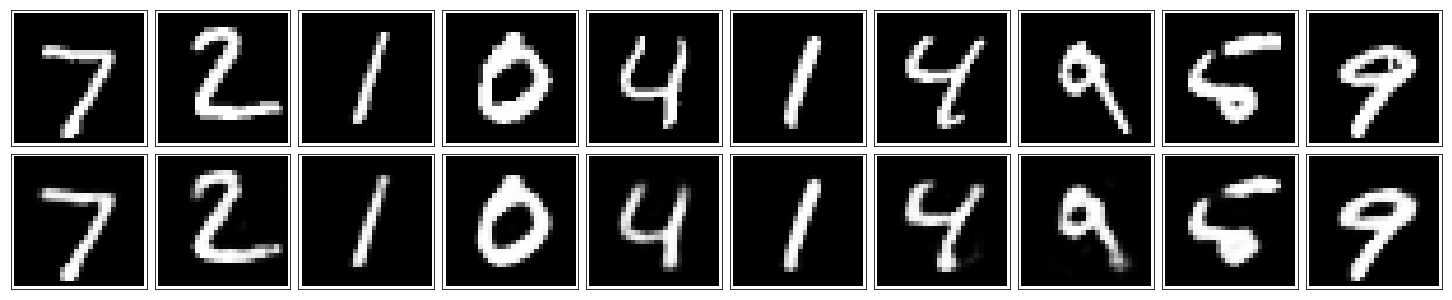

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction.